In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
%matplotlib inline
sns.set_style()

In [3]:
data = pd.read_csv('../data/data.csv',index_col=None)

In [4]:
data.head()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,label
0,321.0,5.0,-17.661,32.245,65.231,-0.460,-0.266,-0.847,26.0,0.0,0
1,1653.0,23.0,11.595,85.465,65.459,-0.955,-0.000,0.296,27.0,0.0,0
2,275.0,9.0,-36.464,67.166,160.189,0.415,0.720,-0.556,26.0,0.0,0
3,1660.0,23.0,61.660,101.635,169.059,-0.955,-0.000,0.296,26.0,0.0,0
4,966.0,16.0,-54.510,-78.323,94.341,-0.827,0.478,-0.296,24.0,0.0,0


# Timeslice Grouping

In order to allow for better visualisations and explorations, the timeslices identified by 15000ns are identified. Attributes are binned into timeslice intervals and assigned a group number starting from 0.

In [5]:
time_range = pd.Series(list(range(0, 1000000000, 15000)))

In [6]:
len(time_range)

66667

In [7]:
data["group"] = pd.cut(data.time, list(time_range), include_lowest=True, labels=False)

# General Stats

In [8]:
data.describe()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,label,group
count,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07
mean,1.035732e+03,1.601316e+01,1.168440e-02,-1.597919e-02,1.171977e+02,2.011426e-04,-5.647887e-05,-1.950327e-01,2.643196e+01,5.005158e+07,1.069192e-02,3.336272e+03
std,5.975225e+02,8.942257e+00,5.125232e+01,6.222670e+01,4.865413e+01,5.809819e-01,5.810460e-01,5.354773e-01,2.626465e+00,2.891125e+07,1.028475e-01,1.927417e+03
min,1.000000e+00,1.000000e+00,-9.462700e+01,-1.156000e+02,3.770000e+01,-9.550000e-01,-9.550000e-01,-1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.180000e+02,8.000000e+00,-4.501800e+01,-5.792500e+01,7.404100e+01,-4.780000e-01,-4.780000e-01,-5.560000e-01,2.500000e+01,2.500466e+07,0.000000e+00,1.666000e+03
50%,1.036000e+03,1.600000e+01,1.309000e+00,-4.184000e+00,1.217000e+02,0.000000e+00,-0.000000e+00,-2.960000e-01,2.600000e+01,5.004292e+07,0.000000e+00,3.336000e+03
75%,1.553000e+03,2.400000e+01,4.045200e+01,4.854100e+01,1.602410e+02,4.780000e-01,4.780000e-01,2.960000e-01,2.800000e+01,7.509229e+07,0.000000e+00,5.006000e+03
max,2.070000e+03,3.100000e+01,9.624300e+01,1.050240e+02,1.966110e+02,9.550000e-01,9.550000e-01,5.580000e-01,2.090000e+02,1.015914e+08,1.000000e+00,6.772000e+03


# Null Values

There are no null/na values

In [9]:
data.isna().any().any()

False

# Attribute Exploration

In [20]:
print("\n Unique DOM IDs: {0} \n Unique PMT IDs: {1} \n Unique Labels: {2} \n Unique timeslice groups: {3}".format(len(data.dom_id.unique()),
                                            len(data.pmt_id.unique()),
                                            len(data.label.unique()),
                                            len(data.group.unique())))              


 Unique DOM IDs: 2070 
 Unique PMT IDs: 31 
 Unique Labels: 2 
 Unique timeslice groups: 6759


# Noise:Signal

In [ ]:
signal_len = len(data[data.label == 1]) 
noise_len = len(data[data.label == 0]) 
noise_signal_ratio = noise_len / signal_len
print("The noise:signal ratio is noted to be roughly {0}:{1}".format(round(noise_signal_ratio), 1))

# Groups

## Group by `time` and `group`: 
Which groups have the most data and what time do they fall under

In [62]:
df_by_group = data[['time', 'group']].groupby(['group']).count().sort_values(by='time', ascending=False)

In [63]:
df_by_group

,time
group,
0,12454
1637,8542
615,8483
5866,8450
5857,8313
...,...
6765,1
6766,1
6767,1


## Group by `group` and `label`:
##### Q1 Which groups have what kind of events?

We can see that group 1 (first timeslice) has highest number of attributes but all noise. Group 1, 6, 9 etc have relatively high hits. Most groups seem to have very low hits given a high noise

##### Q2 Which groups have most number of hits?
Groups 615 (1692), 1637 (1604), 5866 (1589) have the largest amount of hits data


##### TODO:
1. Just Hits vs Noise
2. timeslice and hits [x]
3. timeslice and noise 
4. timeslice and hits + noise


In [191]:
df_by_label = data[['group', 'label']].groupby(['group', 'label'])['label'].count()

In [185]:
df_by_label[:10]

group  label
0      0        12454
1      0         6728
       1          188
2      0         6803
       1            2
3      0         6748
4      0         6697
5      0         6776
       1          141
6      0         6739
Name: label, dtype: int64

In [110]:
df_only_hits = data[['group', 'label']][data.label == 1].groupby('group')['label'].count().sort_values(ascending=False)

In [118]:
df_only_hits[:20]

group
615     1692
1637    1604
5866    1589
5857    1517
1232    1413
2021    1372
554     1312
4301    1259
1273    1258
6495    1247
3170    1188
6588    1115
4958    1107
3398    1098
5747    1096
2211    1043
4565    1027
1599    1026
716      971
3483     969
Name: label, dtype: int64

In [125]:
df_only_hits = pd.DataFrame(df_only_hits)

In [133]:
df_only_hits = df_only_hits.reset_index()

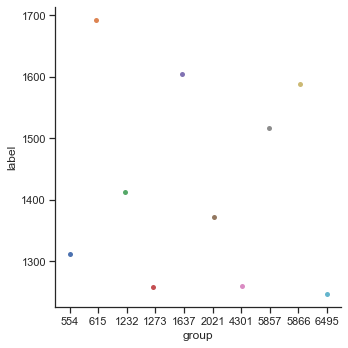

In [156]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x='group', y="label", data=df_only_hits[:10])

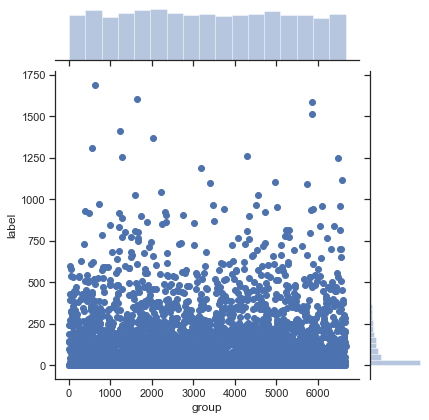

In [143]:
sns.jointplot(x='group', y="label", data=df_only_hits)

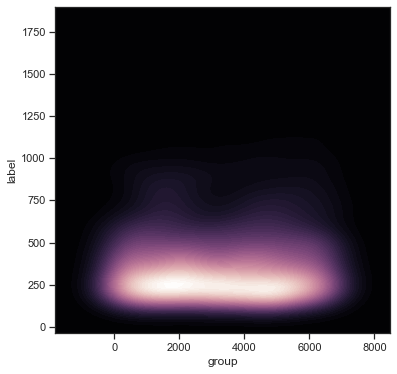

In [152]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df_only_hits[:1000].group, df_only_hits[:1000].label, cmap=cmap, n_levels=60, shade=True)

In [346]:
# groups with higest hits vs noise
highest_hits = df_only_hits.group[:2]

In [347]:
highest_hits_noise = data[data['group'].isin(highest_hits)][['time', 'label', 'group']]

In [322]:
highest_hits_noise = pd.DataFrame(highest_hits_noise.groupby(['group', 'label'])['label'].count())
highest_hits_noise.columns = ['count']
highest_hits_noise = highest_hits_noise.reset_index()
highest_hits_noise

,group,label,count
0,554,0,6884
1,554,1,1312
2,615,0,6791
3,615,1,1692
4,1232,0,6569
5,1232,1,1413
6,1273,0,6899
7,1273,1,1258
8,1637,0,6938
9,1637,1,1604


In [348]:
len(highest_hits_noise)

17025

In [ ]:
g_highest_hits_noise = sns.catplot(x='group', y="time",
                                   hue='label',
                                   kind="swarm",
                                   data=highest_hits_noise,
                                   aspect=1,
                                   height=6)


g_highest_hits_noise.set_ylabels("Time (in ns)")
g_highest_hits_noise.set_xlabels("Timeslice groups")
titles = g_highest_hits_noise.axes.flatten()
titles[0].set_title("Top 20 Timeslice Groups with the highest number of hits", fontsize=12)
new_labels = ['noise', 'hits']
for t, l in zip(g_highest_hits_noise._legend.texts, new_labels): t.set_text(l)
    
plt.savefig("../assets/top_groups_noise_vs_hits.png")

# Positions `pos_x, pos_y, pos_z`

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data[:30000].pos_x, data[:30000].pos_y, data[:30000].pos_z)

In [ ]:
data_dom = data.groupby(['dom_id']).count()

In [ ]:
data_dom['pmt_id'].sort_values(ascending=False)

data_dom['pmt_id'].sort_values

The Doms with the largest amount of points are chosen for plotting to accommodate for large dataset :
1645, 1239, 1138, 1944, 1719

In [ ]:
# distribution of tot
# tot per label type

In [ ]:
dom_id_list = [1645, 1239, 1138, 1944, 1719]

fig = plt.figure(figsize=(15, 15))
fig.suptitle("Plot of noise and hits for the top 5 Dom IDs")

ax = fig.add_subplot(321, projection='3d')
ax.scatter3D(data[data.dom_id == dom_id_list[0]].pos_x,
             data[data.dom_id == dom_id_list[0]].pos_y,
            data[data.dom_id == dom_id_list[0]].pos_z)
ax.set_title("Distribution of 22747 points for Dom ID 1645")

ax = fig.add_subplot(322, projection='3d')
ax.scatter3D(data[data.dom_id == dom_id_list[1]].pos_x,
             data[data.dom_id == dom_id_list[1]].pos_y,
            data[data.dom_id == dom_id_list[1]].pos_z)
ax.set_title("Distribution of 22658 points for Dom ID 1239")


ax = fig.add_subplot(323, projection='3d')
ax.scatter3D(data[data.dom_id == dom_id_list[2]].pos_x,
             data[data.dom_id == dom_id_list[2]].pos_y,
            data[data.dom_id == dom_id_list[2]].pos_z)
ax.set_title("Distribution of 22649 points for Dom ID 1138")


ax = fig.add_subplot(324, projection='3d')
ax.scatter3D(data[data.dom_id == dom_id_list[3]].pos_x,
             data[data.dom_id == dom_id_list[3]].pos_y,
            data[data.dom_id == dom_id_list[3]].pos_z)
ax.set_title("Distribution of 22642 points for Dom ID 1994")


ax = fig.add_subplot(325, projection='3d')
ax.scatter3D(data[data.dom_id == dom_id_list[4]].pos_x,
             data[data.dom_id == dom_id_list[4]].pos_y,
            data[data.dom_id == dom_id_list[4]].pos_z)
ax.set_title("Distribution of 22613 points for Dom ID 1719")

plt.savefig("../assets/pos_per_dom.png")

## Positions x, y, x for Hits

In [ ]:
hits = data[data['label'] == 1]
hits.head()

In [ ]:
hits_dom = hits.groupby(['dom_id']).count()
hits_dom['pmt_id'].sort_values(ascending=False)

In [ ]:
hits_dom_list = [437, 36]

fig = plt.figure(figsize=(15, 5))
fig.suptitle("Plot of DOMs with Least and Most Hits")

ax = fig.add_subplot(121, projection='3d')
ax.scatter3D(hits[hits.dom_id == hits_dom_list[0]].pos_x,
             hits[hits.dom_id == hits_dom_list[0]].pos_y,
            hits[hits.dom_id == hits_dom_list[0]].pos_z)
ax.set_title("Distribution of 354 points for Dom ID 437")

ax = fig.add_subplot(122, projection='3d')
ax.scatter3D(hits[hits.dom_id == hits_dom_list[1]].pos_x,
             hits[hits.dom_id == hits_dom_list[1]].pos_y,
            hits[hits.dom_id == hits_dom_list[1]].pos_z)
ax.set_title("Distribution of 113 points for Dom ID 36")

plt.savefig("../assets/hitspos_per_dom.png")

# Doms and PMT IDs

len(data.groups.unique)